# Preliminary Analysis
This notebook showcases the preliminary data used to assess the feasibility of using trademark data as a market indicator.

In [9]:
# Import helpful modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Sources
Number of establishments less than 1 year old
* Source: U.S. Bureau of Labor Statistics
* URL: https://www.bls.gov/bdm/entrepreneurship/bdm_chart1.htm

Historical market close data (yearly close)
* Dow Jones I.A.: https://www.macrotrends.net/1319/dow-jones-100-year-historical-chart
* NASDAQ: https://www.macrotrends.net/1320/nasdaq-historical-chart
* S&P 500: https://www.macrotrends.net/2324/sp-500-historical-chart-data

Historical number of trademarks
* Source: World intellectual property organization (WIPO)
* URL: https://www3.wipo.int/ipstats/index.htm?tab=trademark

In [2]:
# Data on the number of establishments < 1 year old
data = pd.read_csv('../data/preliminary_data.csv',
                   skipinitialspace=True)
data.describe

<bound method NDFrame.describe of     Year  Establishments < 1 yr  DJIA yearly close  NASDAQ yearly close  \
0   1994                 569419            3834.44               751.96   
1   1995                 604415            5117.12              1052.13   
2   1996                 609638            6448.27              1291.03   
3   1997                 639114            7908.30              1570.35   
4   1998                 643070            9181.43              2192.69   
5   1999                 650730           11497.12              4069.31   
6   2000                 674644           10787.99              2470.52   
7   2001                 671383           10021.57              1950.40   
8   2002                 659236            8341.63              1335.51   
9   2003                 662543           10453.92              2003.37   
10  2004                 653887           10783.01              2175.44   
11  2005                 679925           10717.50              22

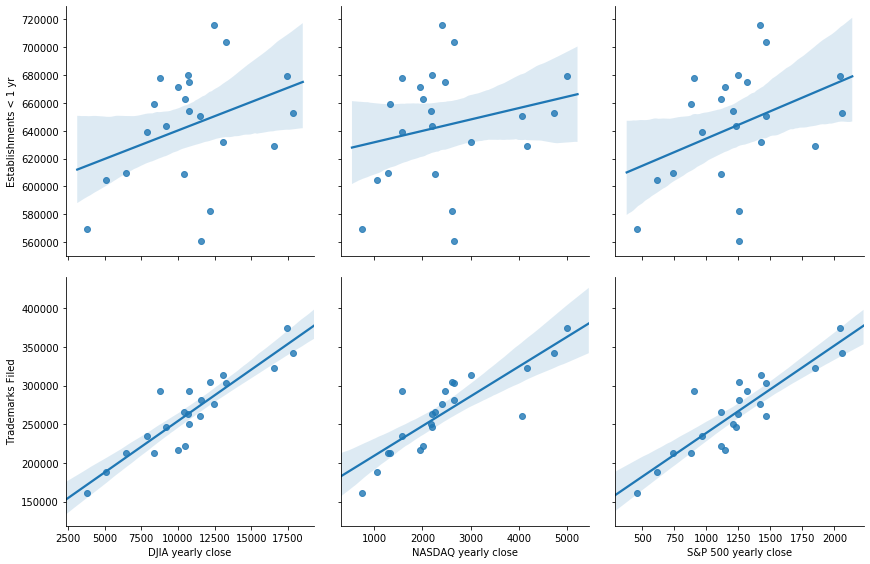

In [3]:
# Investigate the data
g = sns.pairplot(data, kind='reg',
                 x_vars=['DJIA yearly close', 'NASDAQ yearly close', 'S&P 500 yearly close'],
                 y_vars=['Establishments < 1 yr','Trademarks Filed'],
                 height=4)
g.savefig('../images/measure_correlations.png')

In [10]:
# Scale the data
data_scaled = pd.DataFrame()
data_scaled['Year'] = data['Year']

# Import a data scaler object
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

for col in data.columns:
    # Scale this column
    if col != 'Year':
        col_data = data[col].values
        data_scaled[col] = scaler.fit_transform(col_data.reshape(-1,1))

data_scaled.describe()

,Year,Establishments < 1 yr,DJIA yearly close,NASDAQ yearly close,S&P 500 yearly close,Trademarks Filed
count,22.000000,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01,2.200000e+01
mean,2004.500000,-1.332268e-15,-9.184572e-16,-6.257621e-16,4.642751e-16,5.248327e-16
std,6.493587,1.023533e+00,1.023533e+00,1.023533e+00,1.023533e+00,1.023533e+00
min,1994.000000,-2.065774e+00,-2.020057e+00,-1.531803e+00,-1.956870e+00,-2.057098e+00
25%,1999.250000,-7.250474e-01,-5.683753e-01,-7.094520e-01,-5.808224e-01,-7.983888e-01
50%,2004.500000,2.015239e-01,-2.934840e-02,-2.018808e-01,5.713069e-03,-1.337644e-02
75%,2009.750000,7.504919e-01,4.460330e-01,1.701486e-01,4.726541e-01,6.956821e-01
max,2015.000000,1.792664e+00,2.006552e+00,2.278547e+00,2.070644e+00,2.156627e+00


## Recession data
Import recession data derived from Wikipedia to show the same regions as are shown in the U.S. Bureau of Labor Statistics chart.

In [11]:
recessions = pd.read_csv('../data/recessions.csv', 
                         skipinitialspace=True)
recessions.head(4)

,year_start,year_stop,description
0,2001.16667,2001.91667,Dot-com crash
1,2007.91667,2009.50000,Great Recession


In [17]:
# Overplot the recession data
def plot_recessions(ax):
    ylims = ax.get_ylim()
    for index, row in recessions.iterrows():
        xlims = [row.year_start, row.year_stop]
        plt.fill_between(xlims, [-3,-3], [3,3], color='lightgray')
    ax.set_ylim(ylims);

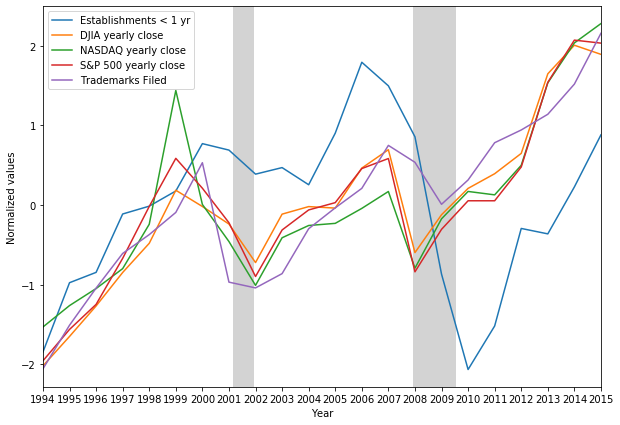

In [18]:
# Make some interesting plots
ax = data_scaled.plot(x='Year', figsize=(10,7), 
                      xticks=range(1994,2016,1))
plt.ylabel('Normalized values')

# Create gray boxes to highlight recessions
plot_recessions(ax)

# Save the image
plt.savefig('../images/trademarks_and_markets.png')

In [15]:
# Import the filings by class
col2keep = ['Nice classification']
for yr in range(2004,2018):
    col2keep.append(str(yr))

tm_classes = pd.read_csv('../data/trademark_applications_by_class.csv',
                         skiprows=6, usecols=col2keep)
tm_classes.describe
#tm_classes['Nice classification']

<bound method NDFrame.describe of    Nice classification   2004   2005   2006   2007   2008   2009   2010  \
0                Other     32     47     49     51     38     41    715   
1             Class 01   4214   4231   4545   4860   4989   4436   4768   
2             Class 02   1338   1351   1274   1417   1452   1178   1247   
3             Class 03  11126  12155  11738  12778  12226  10955  11573   
4             Class 04   1420   1505   1669   1778   1789   1593   1635   
5             Class 05  12809  13043  14042  14707  14832  14128  14762   
6             Class 06   3181   3590   3658   4051   3915   3583   3682   
7             Class 07   4999   5255   5733   6359   6308   5479   5772   
8             Class 08   2073   1987   2157   2254   2075   1841   2037   
9             Class 09  36076  38558  39627  42838  40011  36695  39252   
10            Class 10   5751   6110   6211   6680   6688   6365   6875   
11            Class 11   5123   5404   5963   6475   6269   6001  

## Breakdown by industry
The individual classifications can be split out by industry. The given industry/class associations are derived from:
* WIPO World Intellectual Property Indicators 2019, Annex B.

In [19]:
# Define which classes belong to which industry
industries = {'Agricultural':             [29, 30, 31, 32, 33, 43],
              'Business services':        [35, 36],
              'Chemicals':                [1, 2, 4],
              'Clothing and accessories': [14, 18, 22, 23, 24, 25, 26, 27, 34],
              'Construction':             [6, 17, 19, 37, 40],
              'Health':                   [3, 5, 10, 44],
              'Household equipment':      [8, 11, 20, 21],
              'Leisure & Education':      [13, 15, 16, 28, 41],
              'Research & Technology':    [9, 38, 42, 45],
              'Transportation':           [7, 12, 39]}

years = range(2004,2018)
# Plot the different classes
fig = plt.figure(figsize=(12,7))
total = np.zeros(len(years))
for ind, classes in industries.items():
    values = np.zeros(len(years))
    # Loop through all the years
    for i,yr in enumerate(years):
        # Loop over all classes
        for clss in classes:
            # Add the data for this class in this year
            cls_name = f'Class {clss:02d}'
            row = tm_classes.loc[tm_classes['Nice classification'] == cls_name]
            values[i] += row[str(yr)]
    total += values

    # Scale and plot the values for this industry
    values = scaler.fit_transform(values.reshape(-1,1))
    plt.plot(years, values, label=ind)

# Scale and plot the normalized total
total = scaler.fit_transform(total.reshape(-1,1))
plt.plot(years, total, label='Total', color='black')

# Add labels
plt.xlabel('Year')
plt.ylabel('Normalized count of trademarks filed')
plt.legend();

# Add recessions
plot_recessions(fig)

plt.savefig('../images/trademarks_filed_by_industry.png')

AttributeError: 'Figure' object has no attribute 'get_ylim'

## Observations
* The three tracked market indices track well with one another.
* The up-tick in trademark filing rate correlates more strongly with the up-tick in the markets than with the rate of new business creations.
* The number of newly created businesses seems to drop when the markets decline. Further, the drop in new businesses continues even after the market begins to recover.

Specific industries:
* Construction: Increases more rapidly, but recovers more slowly after the recession caused by the housing crash around 2008.
* Agriculture: Has been growing more slowly than other industries in recent years, possibly in connection with the U.S./China trade war.